In [1]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)

### Dataset Collection
We are using the `psychiatric_drug_webmd_reviews.csv` dataset for this analysis and for model testing. This dataset contains reviews for various conditions and the corresponding ratings. The dataset was chosen due to its rich text data which is suitable for natural language processing tasks. Below is a brief overview of the dataset:
- **Source**: [Drugs](https://www.webmd.com/drugs/2/condition-1022/depression)
- **Columns**:`Unnamed: 0`, `drug_name`, `date`, `age`, `gender`, `time_on_drug`,`reviewer_type`, `condition`, `rating_overall`, `rating_effectiveness`,`rating_ease_of_use`, `rating_satisfaction`, `review`




In [2]:
#Importing the dataset
df=pd.read_csv('/content/psychiatric_drug_webmd_reviews.csv')
df.head()

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,review
0,0,Vanatrip Oral,02-05-2008,35-44,Female,less than 1 month,Patient,Posttraumatic Stress Syndrome,3.3,3,4,3,NaN
1,1,Fluvoxamine (Luvox),06-09-2024,25-34,Female,2 to less than 5 years,Patient,Obsessive Compulsive Disorder,5.0,5,5,5,I've been on over ten different psych medicati...
2,2,Fluvoxamine (Luvox),11/20/2023,65-74,Male,NaN,Patient,Depression,1.3,1,2,1,I felt dizzy dont know where I am.\nVery bad.\...
3,3,Fluvoxamine (Luvox),11/20/2023,65-74,Male,less than 1 month,Patient,Depression,1.7,1,3,1,Dit is uiters tragies. My gp het dit voorgeskr...
4,4,Fluvoxamine (Luvox),11/16/2023,19-24,Female,5 to less than 10 years,Patient,Obsessive Compulsive Disorder,4.3,5,5,3,"Let me begin this by saying, I will never ever..."


In [3]:
#Getting the information for condtition column
df.condition.value_counts()

condition
Other                                                 940
Depression                                            731
Neuropathic Pain                                      648
Migraine Prevention                                   400
Chronic Trouble Sleeping                              172
Itching                                               147
Obsessive Compulsive Disorder                         143
Disorder characterized by Stiff                       125
Anxiousness associated with Depression                107
Anxious                                                86
Nerve Pain                                             56
Posttraumatic Stress Syndrome                          36
Panic Disorder                                         34
Bipolar Depression                                     32
Problems with Bladder Control                          24
Osteoporosis                                           15
Bedwetting                                             15
Atte

In [4]:
#Getting the shape of the dataset
df.shape

(3763, 13)

In [5]:
#Top 5 conditions

df = df[df['condition'] != 'Other']

# Get the top 5 conditions by their frequency
top_5_conditions = df['condition'].value_counts().head(5).index.to_list()

# Filter the DataFrame to only include reviews for the top 5 conditions
df_top_5 = df[df['condition'].isin(top_5_conditions)]

In [6]:
df_top_5.head()

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,review
2,2,Fluvoxamine (Luvox),11/20/2023,65-74,Male,NaN,Patient,Depression,1.3,1,2,1,I felt dizzy dont know where I am.\nVery bad.\...
3,3,Fluvoxamine (Luvox),11/20/2023,65-74,Male,less than 1 month,Patient,Depression,1.7,1,3,1,Dit is uiters tragies. My gp het dit voorgeskr...
6,6,Fluvoxamine (Luvox),8/27/2022,55-64,Female,2 to less than 5 years,Patient,Depression,5.0,5,5,5,Verrry important …drink a full glass of water ...
12,12,Fluvoxamine (Luvox),03-08-2022,55-64,Female,NaN,Patient,Depression,1.0,1,1,1,Within 20 minutes of taking my first pill of t...
22,22,Fluvoxamine (Luvox),12-04-2017,55-64,Female,10 years or more,Patient,Depression,5.0,5,5,5,NaN


In [7]:
#Using the condition and review feature for the further analysis
df_top_5 = df_top_5[['condition', 'review']]
df_top_5.head()

,condition,review
2,Depression,I felt dizzy dont know where I am.\nVery bad.\...
3,Depression,Dit is uiters tragies. My gp het dit voorgeskr...
6,Depression,Verrry important …drink a full glass of water ...
12,Depression,Within 20 minutes of taking my first pill of t...
22,Depression,NaN


In [8]:
#Final shape of the dataset
df_top_5.shape

(2098, 2)

In [9]:
df_top_5.condition.value_counts()

condition
Depression                  731
Neuropathic Pain            648
Migraine Prevention         400
Chronic Trouble Sleeping    172
Itching                     147
Name: count, dtype: int64

In [10]:
 #Fetching the TOP-5 condtions from the dataset
itching=df_top_5[df_top_5['condition']=='Itching']
depression=df_top_5[df_top_5['condition']=='Depression']
neuropathic_pain=df_top_5[df_top_5['condition']=='Neuropathic Pain']
migraine=df_top_5[df_top_5['condition']=='Migraine Prevention']
chronic_sleeping=df_top_5[df_top_5['condition']=='Chronic Trouble Sleeping']

In [11]:
# Drop rows where 'review' is NaN
df_top_5 = df_top_5.dropna(subset=['review'])

### Wordcloud

In [12]:
#Importing library for wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

#### Wordcloud for Itching condition

Text(0.5, 1.0, 'Word Cloud for Itching')

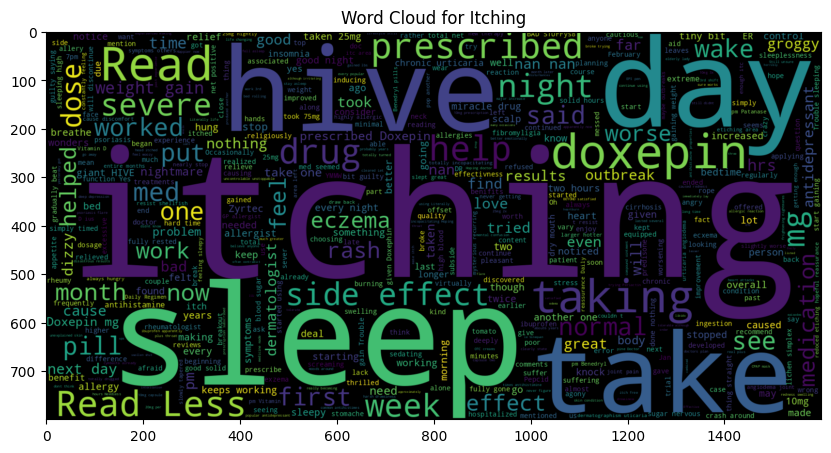

In [13]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=500, width=1600, height=800).generate(' '.join([str(r) for r in itching.review]))  # Convert all elements to strings
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Itching')

#### Wordcloud for Depression condition

Text(0.5, 1.0, 'Word Cloud for Depression')

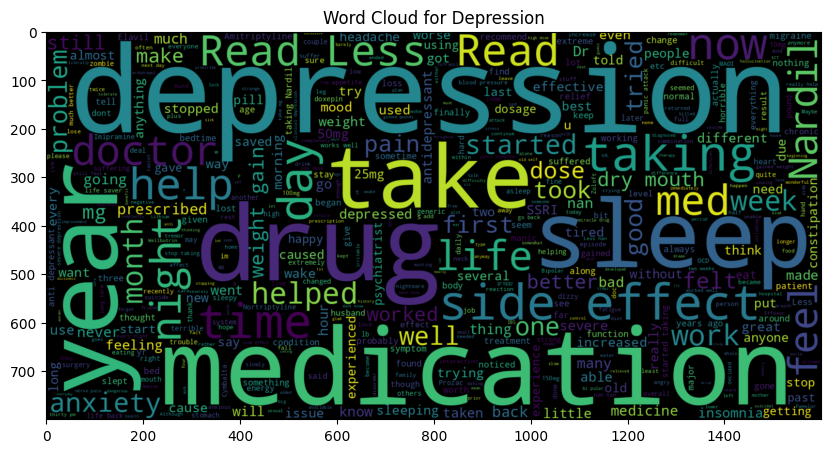

In [14]:
plt.figure(figsize=(10,10))

wc = WordCloud(max_words=500, width=1600, height=800).generate(' '.join([str(r) for r in depression.review]))  # Convert all elements to strings
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for Depression')

#### Wordcloud for Neuropathic pain

Text(0.5, 1.0, 'Word Cloud for Neuropathic pain')

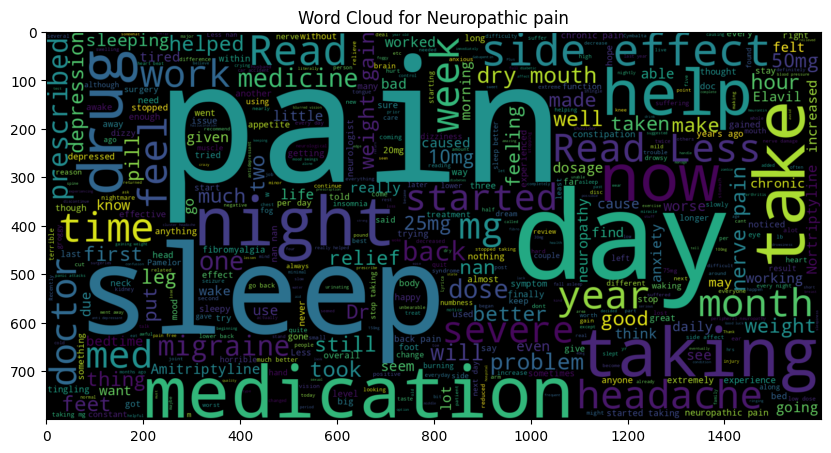

In [15]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=500, width=1600, height=800).generate(' '.join([str(r) for r in neuropathic_pain.review]))  # Convert all elements to strings

plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for Neuropathic pain')

#### Wordcloud for Migraine condition

Text(0.5, 1.0, 'Word Cloud for Migraine')

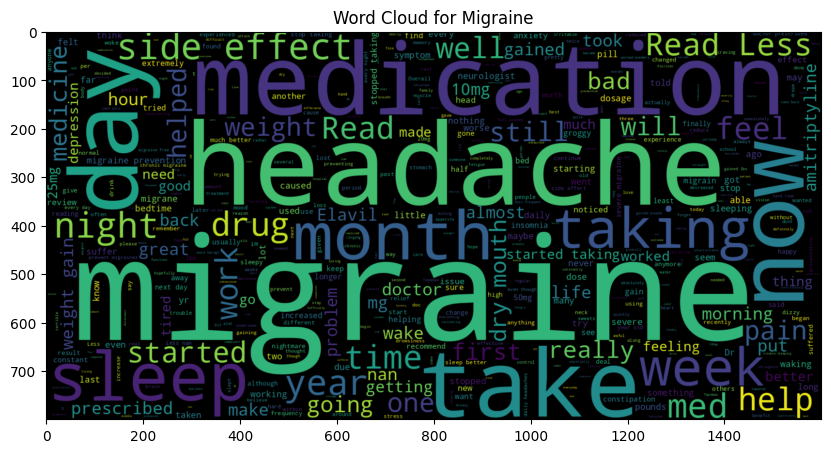

In [16]:
plt.figure(figsize=(10,10))

wc = WordCloud(max_words=500, width=1600, height=800).generate(' '.join([str(r) for r in migraine.review]))  # Convert all elements to strings

plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for Migraine')

#### Wordcloud for Chronic Sleeping

Text(0.5, 1.0, 'Word Cloud for Acne')

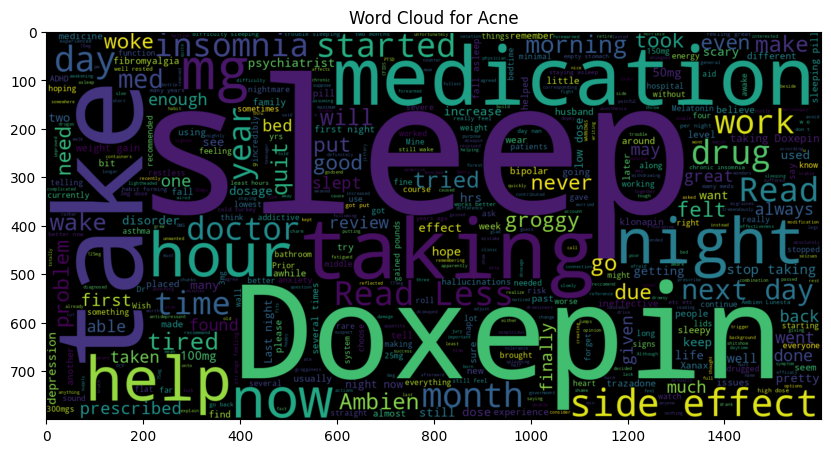

In [17]:
plt.figure(figsize=(10,10))
# wc=WordCloud(max_words=500,width=1600,height=800).generate(' '.join(acne.review))
wc = WordCloud(max_words=500, width=1600, height=800).generate(' '.join([str(r) for r in chronic_sleeping.review]))  # Convert all elements to strings

plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for Acne')

### Data Preprocssing

In [18]:
for i,col in enumerate(df_top_5.columns):
  df_top_5.iloc[:,i]=df_top_5.iloc[:,i].str.replace('"','')


In [19]:
pd.set_option('display.max_colwidth',None)
df_top_5.head()

,condition,review
2,Depression,"I felt dizzy dont know where I am.\nVery bad.\nI used yelate trasifone. I was so dizy that I fall.\nGp descripe 2. ,5 tablets a day. I phoned her and told her I cannot cope. She increased it to 3 a day. It was realy bad."
3,Depression,Dit is uiters tragies. My gp het dit voorgeskryf en ek gebruik trasidone. Was n onaangename week. Ongebalenseerd kon nie stil sit vreeslike gevoel. Het ook geval erg. Kon nie alleen loop.moes ondersteun word.\nVreeslik \n
6,Depression,Verrry important …drink a full glass of water with this or you will get bad indigestion
12,Depression,Within 20 minutes of taking my first pill of this I felt as if I had been poisoned. It's now several hours later and I'm feeling desperately sick in my stomach and intestines. I can barely move and almost feel paralyzed. I pray this leaves my system soon.
28,Depression,Powerful interaction occurs when used with diazepam.


### Stopwords

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Lemmatization add image in it

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('wordnet')
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
# Example usage for porter stemmer
print(porter.stem('running'))
print(porter.stem('sportingly'))
print(porter.stem('troubled'))

run
sportingli
troubl


In [24]:
# Example usage gor lemmatizer
print(lemmatizer.lemmatize('running'))
print(lemmatizer.lemmatize('sportingly'))
print(lemmatizer.lemmatize('troubled'))

running
sportingly
troubled


### Data Cleaning and Text Preprocessing
We will preprocess the text data by performing the following steps:
1. Removing HTML tags
2. Removing non-alphabetic characters
3. Converting to lowercase
4. Removing stopwords
5. Lemmatizing the words

In [25]:
from bs4 import BeautifulSoup
import re

In [26]:
def review_to_words(review):
  review=BeautifulSoup(review,'html.parser').get_text()  #Delete HTML elements
  letters=re.sub('[^a-zA-Z]',' ',review) #Creating a space
  words=letters.lower().split() # Converting to lower case
  meaning_words=[w for w in words if w not in stop] # Stopwords
  lemmatize_w=[lemmatizer.lemmatize(w) for w in meaning_words] #Performing lemmatization
  return(' '.join(lemmatize_w)) #Joining the words

In [27]:
df_top_5['review_clean']=df_top_5['review'].apply(review_to_words)

<ipython-input-26-90b7feb66534>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review=BeautifulSoup(review,'html.parser').get_text()  #Delete HTML elements


In [28]:
df_top_5.head()

,condition,review,review_clean
2,Depression,"I felt dizzy dont know where I am.\nVery bad.\nI used yelate trasifone. I was so dizy that I fall.\nGp descripe 2. ,5 tablets a day. I phoned her and told her I cannot cope. She increased it to 3 a day. It was realy bad.",felt dizzy dont know bad used yelate trasifone dizy fall gp descripe tablet day phoned told cannot cope increased day realy bad
3,Depression,Dit is uiters tragies. My gp het dit voorgeskryf en ek gebruik trasidone. Was n onaangename week. Ongebalenseerd kon nie stil sit vreeslike gevoel. Het ook geval erg. Kon nie alleen loop.moes ondersteun word.\nVreeslik \n,dit uiters tragies gp het dit voorgeskryf en ek gebruik trasidone n onaangename week ongebalenseerd kon nie stil sit vreeslike gevoel het ook geval erg kon nie alleen loop moes ondersteun word vreeslik
6,Depression,Verrry important …drink a full glass of water with this or you will get bad indigestion,verrry important drink full glass water get bad indigestion
12,Depression,Within 20 minutes of taking my first pill of this I felt as if I had been poisoned. It's now several hours later and I'm feeling desperately sick in my stomach and intestines. I can barely move and almost feel paralyzed. I pray this leaves my system soon.,within minute taking first pill felt poisoned several hour later feeling desperately sick stomach intestine barely move almost feel paralyzed pray leaf system soon
28,Depression,Powerful interaction occurs when used with diazepam.,powerful interaction occurs used diazepam


### Word Vectorization
We will use two different word vectorization methods: TF-IDF and Bag of Words. These methods will help us convert the text data into numerical representations for model building.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_top_5['review_clean'])

# Bag of Words Vectorization
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df_top_5['review_clean'])


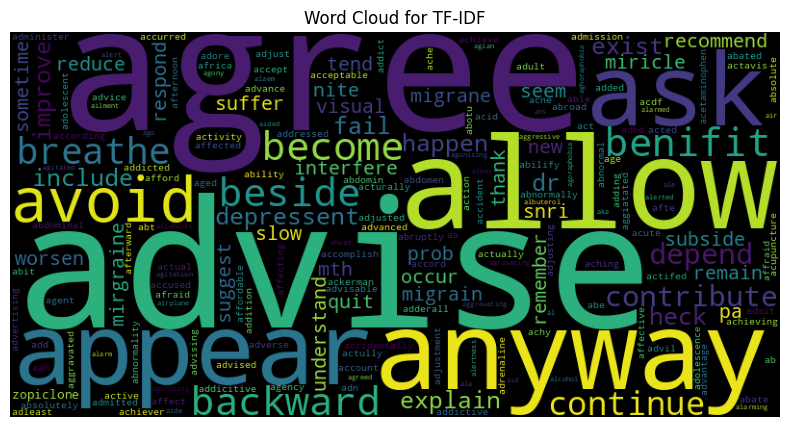

In [30]:
# Word Cloud for TF-IDF
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_wordcloud = WordCloud(width=800, height=400).generate(' '.join(tfidf_words))
plt.figure(figsize=(10,5))
plt.imshow(tfidf_wordcloud)
plt.title('Word Cloud for TF-IDF')
plt.axis('off')
plt.show()


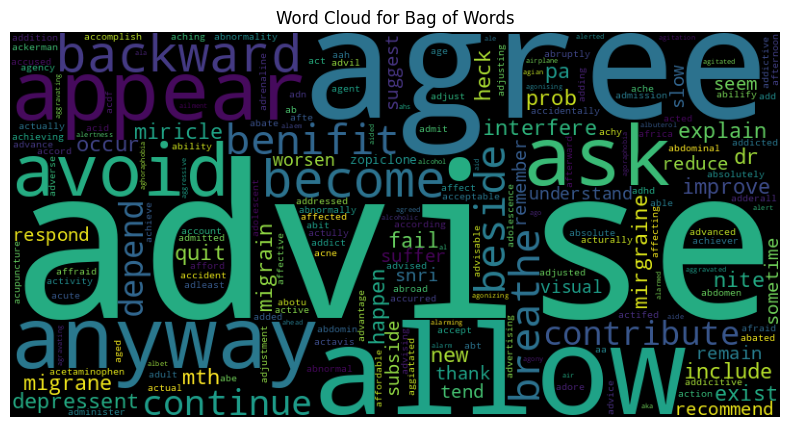

In [31]:
# Word Cloud for Bag of Words
bow_words = bow_vectorizer.get_feature_names_out()
bow_wordcloud = WordCloud(width=800, height=400).generate(' '.join(bow_words))
plt.figure(figsize=(10,5))
plt.imshow(bow_wordcloud)
plt.title('Word Cloud for Bag of Words')
plt.axis('off')
plt.show()

### Creating features and Target Variable

In [32]:
X=df_top_5['review_clean']
y=df_top_5['condition']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize the confusion matrix if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

### Bag of words

In [35]:
count_vectorizer = CountVectorizer(stop_words='english')
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

#### Model Implementation: Naive Bayes

0.7154471544715447
Confusion matrix, without normalization
[[14  4  2  1  0]
 [ 0 97 30  5  1]
 [ 0 13 86 14  2]
 [ 0 14 13 41  2]
 [ 0  0  2  2 26]]


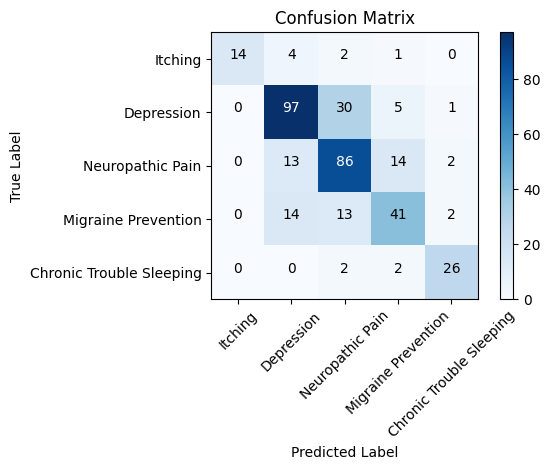

In [36]:
NB=MultinomialNB()
NB.fit(X_train_bow,y_train)
y_pred=NB.predict(X_test_bow)
score=metrics.accuracy_score(y_test,y_pred)
print(score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])


#### Prediction

In [37]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.  '''
test=count_vectorizer.transform([text])
prediction=NB.predict(test)[0]
print(prediction)

Depression


#### Decision Tree

Accuracy Score: 0.7479674796747967
Confusion matrix, without normalization
[[21  0  0  0  0]
 [ 2 98 20  9  4]
 [ 1 18 79 15  2]
 [ 0  8 10 51  1]
 [ 0  0  3  0 27]]


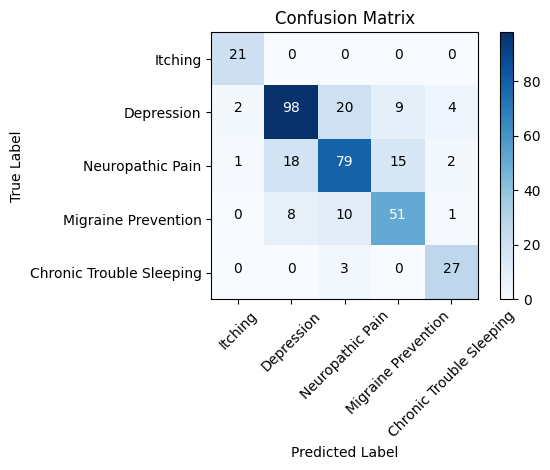

In [38]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train_bow,y_train)
y_pred=dc.predict(X_test_bow)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)

cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])

#### Prediction

In [39]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=count_vectorizer.transform([text])
prediction=dc.predict(test)[0]
print(prediction)

Neuropathic Pain


#### Passive Aggressive Classifier

Accuracy Score: 0.7425474254742548
Confusion matrix, without normalization
[[ 21   0   0   0   0]
 [  2 100  17  10   4]
 [  2  11  85  16   1]
 [  0  14  16  38   2]
 [  0   0   0   0  30]]


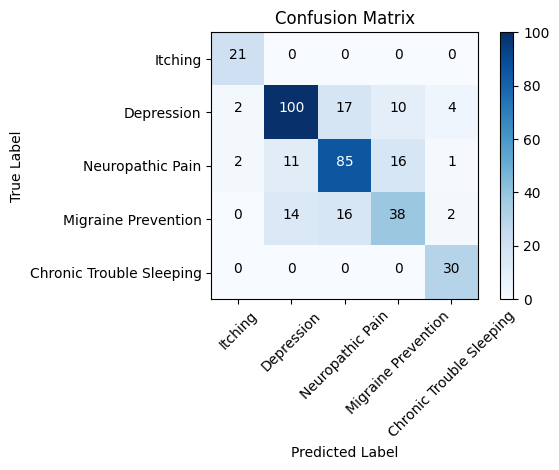

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(X_train_bow,y_train)
y_pred=pac.predict(X_test_bow)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])


#### Prediction

In [41]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=count_vectorizer.transform([text])
prediction=pac.predict(test)[0]
print(prediction)

Depression


### TF-IDF BIGRAM

In [42]:
tf_bigram=TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X_train_tf_bigram=tf_bigram.fit_transform(X_train)
X_test_tf_bigram=tf_bigram.transform(X_test)

#### Model Implementation: Passive Aggressive Classifier

Accuracy Score: 0.8157181571815718
Confusion matrix, without normalization
[[ 21   0   0   0   0]
 [  1 105  16  10   1]
 [  0   9  94  12   0]
 [  0   8  10  51   1]
 [  0   0   0   0  30]]


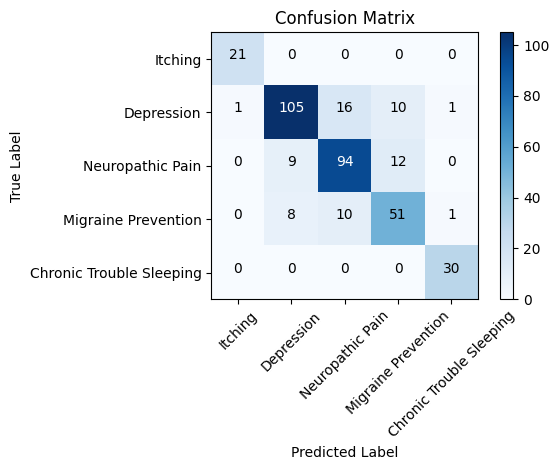

In [43]:
pc=PassiveAggressiveClassifier()
pc.fit(X_train_tf_bigram,y_train)
y_pred=pc.predict(X_test_tf_bigram)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])

#### Prediction

In [44]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=tf_bigram.transform([text])
prediction=pc.predict(test)[0]
print(prediction)

Depression


#### Naive Bayes

Accuracy Score: 0.5555555555555556
Confusion matrix, without normalization
[[  0  18   3   0   0]
 [  0 117  16   0   0]
 [  0  36  79   0   0]
 [  0  44  20   6   0]
 [  0  23   4   0   3]]


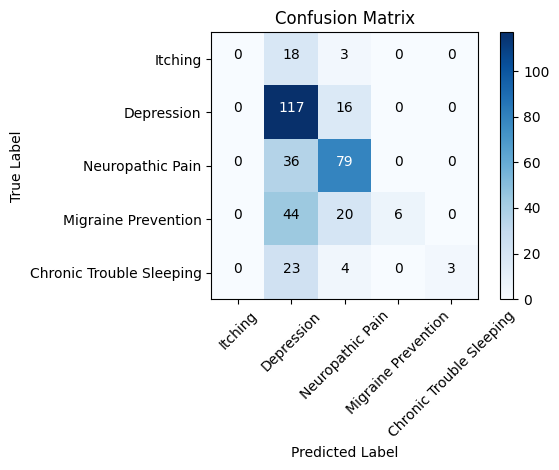

In [45]:
NB=MultinomialNB()
NB.fit(X_train_tf_bigram,y_train)
y_pred=NB.predict(X_test_tf_bigram)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])


#### Prediction

In [46]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=tf_bigram.transform([text])
prediction=NB.predict(test)[0]
print(prediction)

Depression


### TF-IDF Vectorizer

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.9)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Model Implementation : Naive Bayes

Accuracy Score: 0.5772357723577236
Confusion matrix, without normalization
[[  0  19   2   0   0]
 [  0 112  21   0   0]
 [  0  27  87   1   0]
 [  0  41  17  12   0]
 [  0  21   7   0   2]]


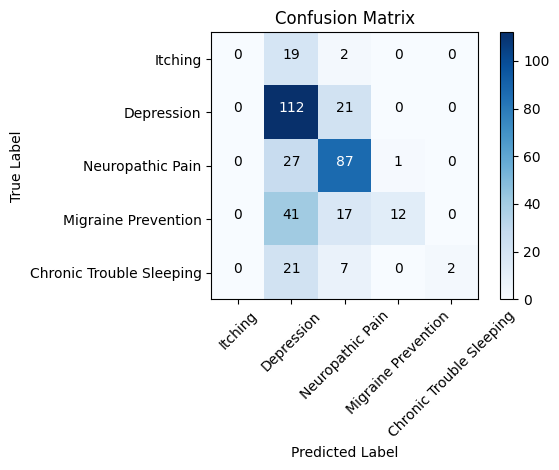

In [48]:
tf_nb=MultinomialNB()
tf_nb.fit(X_train_tfidf,y_train)
y_pred=tf_nb.predict(X_test_tfidf)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])

#### Prediction

In [49]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=tfidf_vectorizer.transform([text])
prediction=tf_nb.predict(test)[0]
print(prediction)

Depression


#### Passive Aggressive Classifier

Accuracy Score: 0.5772357723577236
Confusion matrix, without normalization
[[  0  19   2   0   0]
 [  0 112  21   0   0]
 [  0  27  87   1   0]
 [  0  41  17  12   0]
 [  0  21   7   0   2]]


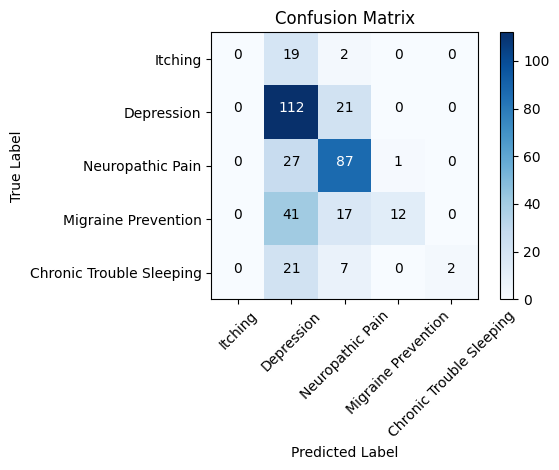

In [50]:
pc=PassiveAggressiveClassifier()
tf_nb.fit(X_train_tfidf,y_train)
y_pred=tf_nb.predict(X_test_tfidf)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])

#### Prediction

In [51]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=tfidf_vectorizer.transform([text])
prediction=tf_nb.predict(test)[0]
print(prediction)

Depression


### TF-IDF TRIGRAMS

In [52]:
tf_trigram=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
X_train_tf_trigram=tf_trigram.fit_transform(X_train)
X_test_tf_trigram=tf_trigram.transform(X_test)

#### Model Implementation : Passive Aggressive Classifier

Accuracy Score: 0.8075880758807588
Confusion matrix, without normalization
[[ 21   0   0   0   0]
 [  2 107  14   9   1]
 [  1   9  92  13   0]
 [  0  10   8  51   1]
 [  0   0   3   0  27]]


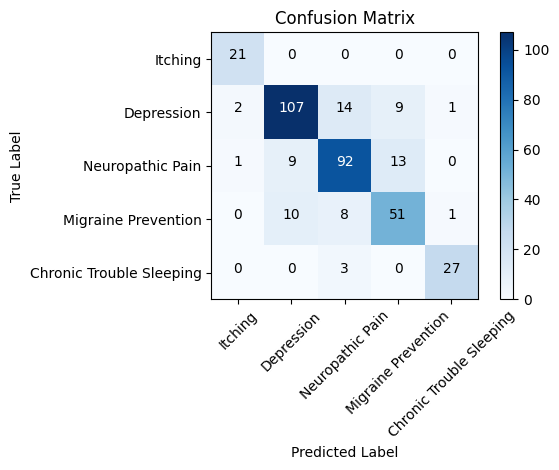

In [53]:
pc=PassiveAggressiveClassifier()
pc.fit(X_train_tf_trigram,y_train)
y_pred=pc.predict(X_test_tf_trigram)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])

#### Prediction

In [54]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=tf_trigram.transform([text])
prediction=pc.predict(test)[0]
print(prediction)

Depression


#### Decision Tree

Accuracy Score: 0.7100271002710027
Confusion matrix, without normalization
[[21  0  0  0  0]
 [ 3 95 20  7  8]
 [ 0 24 75 12  4]
 [ 0  8 17 44  1]
 [ 0  0  0  3 27]]


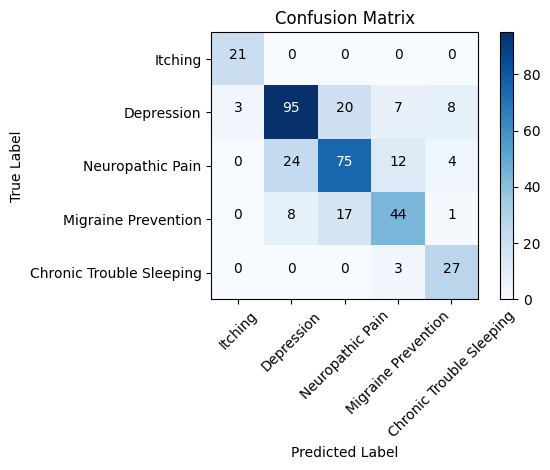

In [55]:
dc=DecisionTreeClassifier()
dc.fit(X_train_tf_trigram,y_train)
y_pred=dc.predict(X_test_tf_trigram)
score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)
cm=metrics.confusion_matrix(y_test,y_pred,labels=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])
plot_confusion_matrix(cm,classes=['Itching','Depression','Neuropathic Pain','Migraine Prevention','Chronic Trouble Sleeping'])

#### Prediction

In [56]:
text='''I have been taking this for 19 years; it saved my life. I had taken sever antidepressants, which I responded fairly well to, but did not get relief from any obsessive compulsive hell 'til this. It did not work for nearly 9 weeks' remember that if you are slow to notice progress. For me, it has been a blessing. My sister is  not able to takes it; if you have manic tendencies it might make you a bit "zippy" or euphoric. I am slightly manic & experienced a bit of this however it wore off & it was the trade I had to make to be able to function. My sister is a genuine manic; this is NOT the med for manic patients.'''
test=tf_trigram.transform([text])
prediction=dc.predict(test)[0]
print(prediction)

Depression


### Important Features

In [57]:
def important_features(vectorizer, classifier, classlabels, n=10):
  labels = list(classifier.classes_).index(classlabels)
  feature_names = vectorizer.get_feature_names_out()
  # Use coefficients instead of log probabilities
  top = sorted(zip(classifier.coef_[labels], feature_names), reverse=True)[:n]
  return dict(top)

In [58]:
important_features(tfidf_vectorizer,pc,'Itching')

{1.243274062143179: 'rubber',
 0.5568723869719641: 'metallic',
 0.48170779769796657: 'earlier',
 0.4715613025289465: 'rls',
 0.45879912847907733: 'relaxing',
 0.39650137444919104: 'midg',
 0.3601781509672065: 'nightly'}

In [59]:
important_features(tfidf_vectorizer,pc,'Depression')

{1.8811210210859894: 'improve',
 1.1528532183137246: 'thur',
 1.0405211608767377: 'honestly',
 1.0325277046959715: 'healthy',
 0.9780385507663145: 'asked',
 0.9370223295636015: 'asks',
 0.9192354751979878: 'tiny',
 0.8223161538413121: 'boyfriend',
 0.7884564298948825: 'partially'}

In [60]:
important_features(tfidf_vectorizer,pc,'Neuropathic Pain')

{1.0280000517826953: 'size',
 0.6840190203786813: 'ending',
 0.6703434225401034: 'ssri',
 0.6052665866884868: 'speak',
 0.5960093935540479: 'endurance',
 0.5871882490084323: 'spaced',
 0.5482599863973318: 'crushing',
 0.5441041755968287: 'combat'}

In [61]:
important_features(tfidf_vectorizer,pc,'Migraine Prevention')

{0.8692463236202665: 'fewer',
 0.6990388751611275: 'rested',
 0.5555530369830618: 'rating',
 0.5477236947153559: 'tried',
 0.5368076395570395: 'precaution',
 0.5359196779538931: 'sure',
 0.505316122695047: 'terror',
 0.5041784534770842: 'praise',
 0.4796335980029234: 'incopacitating',
 0.47213477919419894: 'commercial'}

In [62]:
important_features(tfidf_vectorizer,pc,'Chronic Trouble Sleeping')

{0.9587394620887741: 'neropathy',
 0.7090863656334437: 'experience',
 0.45910348288981767: 'ointment',
 0.45754437911507917: 'showing',
 0.43763245495030906: 'nie',
 0.4160787125192653: 'note',
 0.41014002538329847: 'shut',
 0.39883531841277453: 'continually'}